<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Verification Steps for Excel Report/Dashboard:</h1>

</div>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

#import warnings
#warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
# Load the dataset and name dataframe
bankloan_df = pd.read_csv('financial_loan.csv')
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [3]:
# lets expand the column view so that we can see all of the data
pd.set_option('display.max_columns', 24)

bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,Current,16-06-2021,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,Current,16-06-2021,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,Current,16-06-2021,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,Current,16-06-2021,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [4]:
# lets take a look at how many rows and columns we have
bankloan_df.shape

(38576, 24)

In [5]:
# lets take a look at the datatypes as well as check for any null values
bankloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

###  We have four date columns which have incorrect datatypes; issue_date, last_credit_pull_date, last_payment_date, and next_payment_date.

### Lets change them to datetime64.

### We also have null values in column emp_title.

In [6]:
# lets change datatype for each date column to datetime64
bankloan_df['issue_date'] = pd.to_datetime(bankloan_df['issue_date'], dayfirst=True)
bankloan_df['last_credit_pull_date'] = pd.to_datetime(bankloan_df['last_credit_pull_date'], dayfirst=True)
bankloan_df['last_payment_date'] = pd.to_datetime(bankloan_df['last_payment_date'], dayfirst=True)
bankloan_df['next_payment_date'] = pd.to_datetime(bankloan_df['next_payment_date'], dayfirst=True)

# lets now create a standard datetime format across all date columns
bankloan_df['issue_date1'] = bankloan_df['issue_date'].dt.strftime('%m/%d/%Y')
bankloan_df['last_credit_pull_date1'] = bankloan_df['last_credit_pull_date'].dt.strftime('%m/%d/%Y')
bankloan_df['last_payment_date1'] = bankloan_df['last_payment_date'].dt.strftime('%m/%d/%Y')
bankloan_df['next_payment_date1'] = bankloan_df['next_payment_date'].dt.strftime('%m/%d/%Y')

In [7]:
# lets verify that the datatypes have been changed
bankloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38576 non-null  int64         
 1   address_state           38576 non-null  object        
 2   application_type        38576 non-null  object        
 3   emp_length              38576 non-null  object        
 4   emp_title               37138 non-null  object        
 5   grade                   38576 non-null  object        
 6   home_ownership          38576 non-null  object        
 7   issue_date              38576 non-null  datetime64[ns]
 8   last_credit_pull_date   38576 non-null  datetime64[ns]
 9   last_payment_date       38576 non-null  datetime64[ns]
 10  loan_status             38576 non-null  object        
 11  next_payment_date       38576 non-null  datetime64[ns]
 12  member_id               38576 non-null  int64 

In [8]:
# lets take a look at the new columns
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021


### We will next create columns weekday and issue_month.

In [9]:
# lets now extract the weekday and day of the month
bankloan_df['weekday'] = bankloan_df['issue_date'].dt.strftime('%A')
bankloan_df['issue_month'] = bankloan_df['issue_date'].dt.strftime("%B") 

In [10]:
#lets take a look at the new columns
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,0.0100,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,0.0535,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,0.2088,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,0.0540,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,0.0231,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.1986,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,0.0458,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.1734,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,0.0009,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October


### We will now create column good_bad_loan so that we can seperate loans that are fully paid off or current from those that are charged off. 

In [11]:
# lets create column good_bad_loan and conditions for labeling Good or Bad
bankloan_df['good_bad_loan']= 'Bad'
bankloan_df.loc[ bankloan_df['loan_status']== 'Current', 'good_bad_loan']= 'Good'
bankloan_df.loc[ bankloan_df['loan_status']== 'Fully Paid', 'good_bad_loan']= 'Good'

In [12]:
# lets take a look at the column
bankloan_df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February,Bad
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January,Bad
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February,Good
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July,Good
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October,Good
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September,Good
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October,Good


In [13]:
# how many columns and rows do we now have?
bankloan_df.shape

(38576, 31)

In [14]:
# lets see if there are any duplicated rows
bankloan_df[ bankloan_df.duplicated()]

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Verification Steps for Excel Report/Dashboard:</h1>

</div>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary  (KPI # 1):</h1>
    
<b>What is the total amount of loan applications?</b>
    
<b>What is the total amount of MTD loan applications?</b>
    
<b>What is the total amount of PMTD loan applications?</b>
</div>

In [15]:
bankloan_df['id'].nunique()

38576

- The total amount of loan applications are 38,576

In [16]:
mtd_loan = bankloan_df[bankloan_df['issue_month']== 'December'].copy()
mtd_loan

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
13,1020855,CA,INDIVIDUAL,5 years,henkel corporation,B,RENT,2021-12-11,2021-12-14,2021-12-14,Fully Paid,2022-01-14,...,268.36,0.1269,8000,15,9661,12/11/2021,12/14/2021,12/14/2021,01/14/2022,Saturday,December,Good
15,1060995,RI,INDIVIDUAL,< 1 year,HSA-UWC,B,RENT,2021-12-11,2021-02-14,2021-10-13,Charged Off,2021-11-13,...,400.99,0.1242,12000,14,9547,12/11/2021,02/14/2021,10/13/2021,11/13/2021,Saturday,December,Bad
16,1046507,TX,INDIVIDUAL,1 year,Child's Day,B,RENT,2021-12-02,2021-04-16,2021-12-14,Fully Paid,2022-01-14,...,98.29,0.0991,3050,8,3538,12/02/2021,04/16/2021,12/14/2021,01/14/2022,Thursday,December,Good
18,1059497,FL,INDIVIDUAL,10+ years,Sandestin Beach Hilton,B,MORTGAGE,2021-12-12,2021-12-14,2021-12-14,Fully Paid,2022-01-14,...,162.87,0.1065,5000,23,5863,12/12/2021,12/14/2021,12/14/2021,01/14/2022,Sunday,December,Good
42,472634,FL,INDIVIDUAL,1 year,walmart,A,RENT,2021-12-09,2021-04-11,2021-11-10,Charged Off,2021-12-10,...,231.75,0.0705,7500,9,2073,12/09/2021,04/11/2021,11/10/2021,12/10/2021,Thursday,December,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,1026558,CA,INDIVIDUAL,4 years,"ACCES I/O Products, Inc.",B,MORTGAGE,2021-12-11,2021-10-14,2021-09-14,Fully Paid,2021-10-14,...,561.44,0.1242,25000,19,31693,12/11/2021,10/14/2021,09/14/2021,10/14/2021,Saturday,December,Good
38516,633392,CT,INDIVIDUAL,10+ years,CVS Pharmacy,B,OWN,2021-12-10,2021-12-15,2021-01-16,Fully Paid,2021-02-16,...,149.98,0.1036,7000,21,8998,12/10/2021,12/15/2021,01/16/2021,02/16/2021,Friday,December,Good
38531,1052169,NY,INDIVIDUAL,1 year,Binder and Binder,C,RENT,2021-12-11,2021-01-12,2021-01-12,Fully Paid,2021-02-12,...,460.10,0.1349,20000,39,20226,12/11/2021,01/12/2021,01/12/2021,02/12/2021,Saturday,December,Good
38535,624384,MA,INDIVIDUAL,4 years,"CH Newton Builders, Inc",C,RENT,2021-12-10,2021-05-16,2021-04-15,Fully Paid,2021-05-15,...,229.33,0.1335,10000,5,13490,12/10/2021,05/16/2021,04/15/2021,05/15/2021,Friday,December,Good


In [17]:
mtd_loan['id'].nunique()

4314

- The total amount of MTD loan applications are 4,314

In [18]:
pmtd_loan = bankloan_df[bankloan_df['issue_month']== 'November'].copy()
pmtd_loan

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,Fully Paid,2022-01-13,...,205.86,0.1427,6000,30,7218,11/19/2021,06/14/2021,12/13/2021,01/13/2022,Friday,November,Good
25,1006769,PA,INDIVIDUAL,6 years,The Mount Sinai School of Medicine,A,MORTGAGE,2021-11-11,2021-11-13,2021-06-13,Charged Off,2021-07-13,...,124.45,0.0751,4000,11,2479,11/11/2021,11/13/2021,06/13/2021,07/13/2021,Thursday,November,Bad
32,1026463,FL,INDIVIDUAL,6 years,sky powersports,C,MORTGAGE,2021-11-11,2021-04-14,2021-12-13,Charged Off,2022-01-13,...,217.32,0.1465,6300,10,5554,11/11/2021,04/14/2021,12/13/2021,01/13/2022,Thursday,November,Bad
44,458797,NV,INDIVIDUAL,8 years,MAD MATT'S Bar & Grille,B,RENT,2021-11-09,2021-11-11,2021-07-11,Charged Off,2021-08-11,...,725.31,0.1148,22000,19,15424,11/09/2021,11/11/2021,07/11/2021,08/11/2021,Tuesday,November,Bad
52,362098,FL,INDIVIDUAL,2 years,Starbucks,D,RENT,2021-11-08,2021-01-11,2021-08-10,Charged Off,2021-09-10,...,136.08,0.1367,4000,13,2685,11/08/2021,01/11/2021,08/10/2021,09/10/2021,Monday,November,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38521,612712,NC,INDIVIDUAL,2 years,GlaxoSmithKline,B,RENT,2021-11-10,2021-02-15,2021-03-15,Fully Paid,2021-04-15,...,234.73,0.0999,16000,32,13861,11/10/2021,02/15/2021,03/15/2021,04/15/2021,Wednesday,November,Good
38529,993927,CA,INDIVIDUAL,4 years,5.11 Tactical,B,RENT,2021-11-11,2021-08-13,2021-08-13,Fully Paid,2021-09-13,...,449.15,0.1242,20000,13,23280,11/11/2021,08/13/2021,08/13/2021,09/13/2021,Thursday,November,Good
38530,997678,MD,INDIVIDUAL,< 1 year,Federal Energy Regulatory Commission,B,RENT,2021-11-11,2021-05-16,2021-03-13,Fully Paid,2021-04-13,...,564.87,0.1269,25000,26,28830,11/11/2021,05/16/2021,03/13/2021,04/13/2021,Thursday,November,Good
38566,1007647,VA,INDIVIDUAL,1 year,"Ebert & Baumann Consulting Engineers, In",C,RENT,2021-11-11,2021-05-16,2021-05-16,Current,2021-06-16,...,345.08,0.1349,15000,7,18588,11/11/2021,05/16/2021,05/16/2021,06/16/2021,Thursday,November,Good


In [19]:
pmtd_loan['id'].nunique()

4035

- The total amount of PMTD loan applications are 4,035

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary  (KPI # 2):</h1>
    
<b>What is the total funded amount?</b>
    
<b>What is the total MTD funded amount?</b>
    
<b>What is the total PMTD funded amount?</b>
</div>

In [20]:
bankloan_df['loan_amount'].sum()

435757075

- The total funded amount is $435,757,075

In [21]:
mtd_loan['loan_amount'].sum()

53981425

- The total MTD funded amount is $53,981,425

In [22]:
pmtd_loan['loan_amount'].sum()

47754825

- The total PMTD funded amount is $47,754,825

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (KPI # 3):</h1>
 
<b>What is the total amount received? </b>
    
<b>What is the total MTD amount received?</b>
    
<b>What is the total PMTD amount received?</b>
</div>

In [23]:
bankloan_df['total_payment'].sum()

473070933

- The total amount received is $473,070,933

In [24]:
mtd_loan['total_payment'].sum()

58074380

- The total MTD amount received is $58,074,380

In [25]:
pmtd_loan['total_payment'].sum()

50132030

- The total PMTD amount received is $50,132,030

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (KPI # 4):</h1>
    
<b>What is the average interest rate?</b>
    
<b>What is the average MTD interest rate?</b>
    
<b>What is the average PMTD interest rate?</b>
</div>

In [26]:
average_rate = bankloan_df['int_rate'].mean()

multiplied_average = average_rate * 100
multiplied_average

12.048831397760265

- The average interest rate is 12.04%

In [27]:
average_rate = mtd_loan['int_rate'].mean()

multiplied_average = average_rate * 100
multiplied_average

12.356040797403804

- The average MTD interest rate is 12.36%

In [28]:
average_rate = pmtd_loan['int_rate'].mean()

multiplied_average = average_rate * 100
multiplied_average

11.94171747211896

- The average PMTD interest rate is 11.94%

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (KPI # 5):</h1>

<b>What is the average DTI? </b>
    
<b>What is the average MTD DTI?</b>
    
<b>What is the average PMTD DTI?</b>
</div>

In [29]:
average_dti = bankloan_df['dti'].mean()

multiplied_dti = average_dti * 100
multiplied_dti

13.327433119037742

- The average DTI is 13.33%

In [30]:
average_dti = mtd_loan['dti'].mean()

multiplied_dti = average_dti * 100
multiplied_dti

13.665537783959206

- The average MTD DTI is 13.67%

In [31]:
average_dti = pmtd_loan['dti'].mean()

multiplied_dti = average_dti * 100
multiplied_dti

13.302733581164809

- The average PMTD DTI is 13.3 %

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (Good and Bad loan issued) :</h1>
    
<b>How many good and bad loan applications were issued?</b>
</div>

In [32]:
bankloan_df['good_bad_loan'].value_counts()

Good    33243
Bad      5333
Name: good_bad_loan, dtype: int64

- There was a total of 33,243 good loan applications (about 86%) issued.
- There was a total of 5,333 bad loan applications (about 14%) issued.

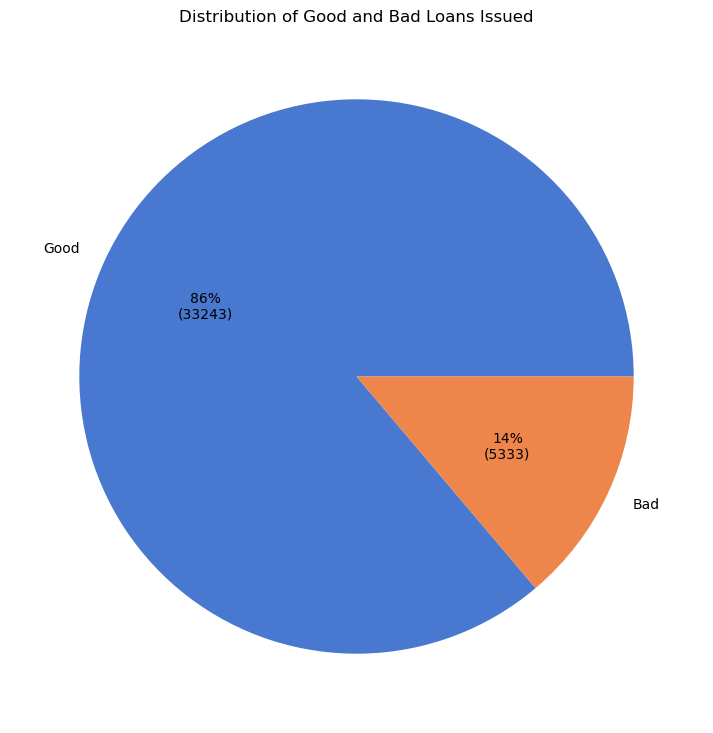

In [33]:
# lets see a distribution of good and bad loans issued 
import matplotlib.pyplot as plt 
import seaborn

ratings_distribution = bankloan_df['good_bad_loan'].value_counts()
values = bankloan_df['good_bad_loan']
numbers = ratings_distribution.index
quantity = ratings_distribution.values
total = len(values)


# Create a custom formatting function showing both % and numeric value
def my_fmt(x):
    return '{:.0f}%\n({:.0f})'.format(x, total * x / 100)

# define Seaborn color palette to use [deep, muted, pastel, bright, dark, colorblind]
palette_color = seaborn.color_palette('muted') 
  
# plotting data on chart 
plt.figure(figsize=(9,9))
plt.pie(ratings_distribution, labels=numbers, colors=palette_color,autopct=my_fmt) 
plt.title('Distribution of Good and Bad Loans Issued')
  
# displaying chart 
plt.show() 

In [34]:
good_loan = bankloan_df[bankloan_df['good_bad_loan']== "Good"].copy()
good_loan

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,109.43,0.1864,3000,4,3939,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,...,97.06,0.1065,4500,9,4911,02/25/2021,12/12/2021,03/12/2021,04/12/2021,Thursday,February,Good
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,...,106.53,0.0603,3500,28,3835,01/01/2021,12/14/2021,01/15/2021,02/15/2021,Friday,January,Good
5,1062608,CA,INDIVIDUAL,3 years,Studio 94 Corp,C,RENT,2021-07-17,2021-03-16,2021-08-12,Fully Paid,2021-09-12,...,275.96,0.1465,8000,11,8637,07/17/2021,03/16/2021,08/12/2021,09/12/2021,Saturday,July,Good
6,1067441,TX,INDIVIDUAL,10+ years,American Airlines,C,MORTGAGE,2021-11-19,2021-06-14,2021-12-13,Fully Paid,2022-01-13,...,205.86,0.1427,6000,30,7218,11/19/2021,06/14/2021,12/13/2021,01/13/2022,Friday,November,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,...,551.64,0.1299,24250,33,31946,07/11/2021,05/16/2021,05/16/2021,06/16/2021,Sunday,July,Good
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,...,579.72,0.1349,25200,18,31870,10/11/2021,04/16/2021,05/16/2021,06/16/2021,Monday,October,Good
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,...,627.93,0.1749,25000,20,35721,09/11/2021,05/16/2021,05/16/2021,06/16/2021,Saturday,September,Good
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,...,612.72,0.1825,24000,9,33677,10/11/2021,05/16/2021,05/16/2021,06/16/2021,Monday,October,Good


In [35]:
bad_loan = bankloan_df[bankloan_df['good_bad_loan']== "Bad"].copy()
bad_loan

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date1,last_credit_pull_date1,last_payment_date1,next_payment_date1,weekday,issue_month,good_bad_loan
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,...,59.83,0.1527,2500,4,1009,02/11/2021,09/13/2021,04/13/2021,05/13/2021,Thursday,February,Bad
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,...,421.65,0.1596,12000,11,3522,01/05/2021,12/12/2021,01/09/2021,02/09/2021,Tuesday,January,Bad
8,1065254,FL,INDIVIDUAL,10+ years,Tech Data Corp,A,MORTGAGE,2021-09-02,2021-06-15,2021-10-12,Charged Off,2021-11-12,...,762.08,0.0890,24000,31,8650,09/02/2021,06/15/2021,10/12/2021,11/12/2021,Thursday,September,Bad
11,1062734,CA,INDIVIDUAL,3 years,myrvpartsplace.com,B,RENT,2021-09-11,2021-03-13,2021-10-12,Charged Off,2021-11-12,...,374.26,0.1242,11200,13,4225,09/11/2021,03/13/2021,10/12/2021,11/12/2021,Saturday,September,Bad
15,1060995,RI,INDIVIDUAL,< 1 year,HSA-UWC,B,RENT,2021-12-11,2021-02-14,2021-10-13,Charged Off,2021-11-13,...,400.99,0.1242,12000,14,9547,12/11/2021,02/14/2021,10/13/2021,11/13/2021,Saturday,December,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38488,521184,MA,INDIVIDUAL,2 years,The Danvers Butchery,D,RENT,2021-05-10,2021-09-15,2021-05-12,Charged Off,2021-06-12,...,116.91,0.1607,4800,5,2807,05/10/2021,09/15/2021,05/12/2021,06/12/2021,Monday,May,Bad
38489,605855,NJ,INDIVIDUAL,2 years,Vericrest Financial Inc,D,RENT,2021-11-10,2021-05-14,2021-01-14,Charged Off,2021-02-14,...,289.09,0.1557,12000,25,11022,11/10/2021,05/14/2021,01/14/2021,02/14/2021,Wednesday,November,Bad
38490,550598,MA,INDIVIDUAL,10+ years,Wendys OFH of New York Inc,E,RENT,2021-07-10,2021-07-13,2021-03-13,Charged Off,2021-04-13,...,368.37,0.1645,15000,10,11582,07/10/2021,07/13/2021,03/13/2021,04/13/2021,Saturday,July,Bad
38491,682280,PA,INDIVIDUAL,2 years,Williams Residential,E,RENT,2021-03-11,2021-04-12,2021-12-11,Charged Off,2022-01-11,...,858.59,0.1640,35000,39,8667,03/11/2021,04/12/2021,12/11/2021,01/11/2022,Thursday,March,Bad


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (Good and Bad loan issued):</h1>
    
<b>What are the good and bad loan funded amounts?</b>
</div>

In [36]:
good_loan['loan_amount'].sum()

370224850

- The good loan funded amount is $370,224,850

In [37]:
bad_loan['loan_amount'].sum()

65532225

- The bad loan funded amount is $65,532,225

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary (Good and Bad loan issued):</h1>

<b>What are the good and bad loan amounts received?</b>
</div>

In [38]:
good_loan['total_payment'].sum()

435786170

- The good loan amounts received are $435,786,170

In [39]:
bad_loan['total_payment'].sum()

37284763

- The bad loan amounts received are $37,284,763

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Summary </h1>
    
<b> Loan Status </b>

In [40]:
bankloan_df.groupby('loan_status').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'),Interest_Rate= ('int_rate','mean'), DTI= ('dti','mean'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount,Interest_Rate,DTI
loan_status,,,,,
Charged Off,5333,37284763,65532225,0.138786,0.140047
Current,1098,24199914,18866500,0.150993,0.147243
Fully Paid,32145,411586256,351358350,0.116411,0.131674


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>
    
<b> Month <b>

In [41]:
bankloan_df.groupby('issue_month').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'),Interest_Rate= ('int_rate','mean'), DTI= ('dti','mean'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount,Interest_Rate,DTI
issue_month,,,,,
April,2755,32495533,29800800,0.117409,0.132194
August,3441,42682218,38149600,0.123002,0.133532
December,4314,58074380,53981425,0.123560,0.136655
February,2279,27717745,24647825,0.117216,0.134093
January,2332,27578836,25031650,0.114619,0.129370
July,3366,38827220,35813900,0.122372,0.132948
June,3184,36164533,34161475,0.122742,0.132438
March,2627,32264400,28875700,0.118583,0.132156
May,2911,33750523,31738350,0.122578,0.133337


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>

<b> Address State <b>

In [42]:
# sort by largest count to smallest
bankloan_df.groupby('address_state').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'),Interest_Rate= ('int_rate','mean'), DTI= ('dti','mean'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount,Interest_Rate,DTI
address_state,,,,,
AK,78,1108570,1031800,0.127915,0.150435
AL,432,5492272,4949225,0.118594,0.141753
AR,236,2777875,2529700,0.117557,0.152133
AZ,833,10041986,9206000,0.122431,0.131855
CA,6894,83901234,78484125,0.121482,0.128443
CO,770,9845810,8976000,0.118150,0.136090
CT,730,9357612,8435575,0.119101,0.128976
DC,214,2921854,2652350,0.120467,0.125146
DE,110,1269136,1138100,0.119956,0.141715


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>
    
<b> Term <b>

In [43]:
bankloan_df.groupby('term').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount
term,,,
36 months,28237,294709458,273041225
60 months,10339,178361475,162715850


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>
    
<b> Employee Length <b>

In [44]:
bankloan_df.groupby('emp_length').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount
emp_length,,,
1 year,3229,35498348,32883125
10+ years,8870,125871616,116115950
2 years,4382,49206961,44967975
3 years,4088,47551832,43937850
4 years,3428,40964850,37600375
5 years,3273,40397571,36973625
6 years,2228,27908658,25612650
7 years,1772,22584136,20811725
8 years,1476,19025777,17558950


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>

<b> Purpose <b>

In [45]:
bankloan_df.groupby('purpose').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount
purpose,,,
Debt consolidation,18214,253801871,232459675
car,1497,11324914,10223575
credit card,4998,65214084,58885175
educational,315,2248380,2161650
home improvement,2876,36380930,33350775
house,366,5185538,4824925
major purchase,2110,18676927,17251600
medical,667,5851372,5533225
moving,559,3999899,3748125


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Bank Loan Report: Overview </h1>
    
<b> Home Ownership <b>

In [46]:
bankloan_df.groupby('home_ownership').agg(Loan_Count= ('id','count'),Total_Amount_Received= ('total_payment','sum'),Total_Funded_Amount= ('loan_amount','sum'))

,Loan_Count,Total_Amount_Received,Total_Funded_Amount
home_ownership,,,
MORTGAGE,17198,238474438,219329150
NONE,3,19053,16800
OTHER,98,1025257,1044975
OWN,2838,31729129,29597675
RENT,18439,201823056,185768475


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Verification Steps Completed </h1>